In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
n=100

apple_width=np.random.normal(6,1,n)
apple_length=np.random.normal(6,1,n)

banana_width=np.random.normal(4,1,n)
banana_length=np.random.normal(10,1,n)

water_melon_width=np.random.normal(15,1,n)
water_melon_length=np.random.normal(15,1,n)

new_fruit_width=12
new_fruit_length=12

In [3]:
#Let's concatenate all fruit to 2D array 
width=np.concatenate([apple_width,banana_width,water_melon_width])
length=np.concatenate([apple_length,banana_length,water_melon_length])
X_train=np.array([width,length]).T

In [4]:
#Let's make lable for each sample

Y_apple=np.zeros(n,dtype=np.int64)
Y_banana=np.ones(n,dtype=np.int64)
Y_water_melon=np.ones(n,dtype=np.int64)*2
Y_train=np.concatenate([Y_apple,Y_banana,Y_water_melon])
Y_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [5]:
def calculate_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [6]:
#calculate distance between new sample and all traind sample
new_fruit=np.array([12,12])
distances=[]
for x in X_train:
    d=calculate_distance(x,new_fruit)
    distances.append(d)



In [7]:
#find nearest_neighbours
k=5
nearest_neighbours = np.argsort(distances)[:k]

In [8]:
#find nearest_neighbours indexes
index=Y_train[nearest_neighbours]


In [9]:
#counting lables to find most one for final result
result = np.bincount(index)

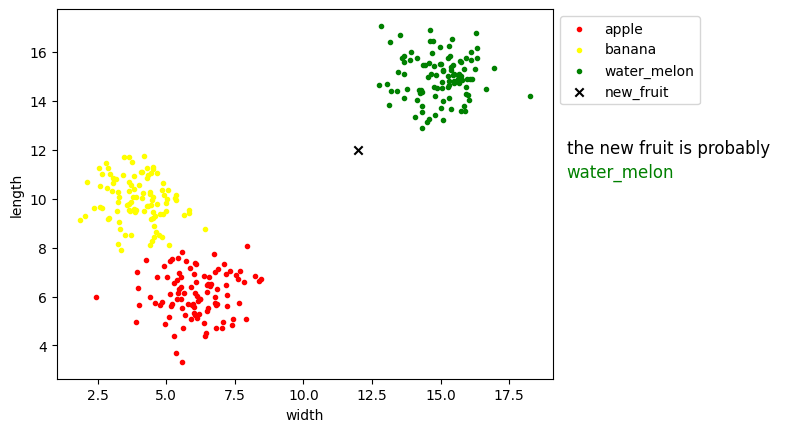

In [10]:
plt.scatter(apple_width,apple_length,c='red',marker=".",label="apple")
plt.scatter(banana_width,banana_length,c='yellow',marker=".",label="banana")
plt.scatter(water_melon_width,water_melon_length,c='green',marker=".",label="water_melon")
plt.scatter(new_fruit_width,new_fruit_length,c='black',marker="x",label="new_fruit")
plt.xlabel("width")
plt.ylabel("length")
plt.legend(bbox_to_anchor = (1 , 1))
if np.argmax(result)==0:
    fruit="apple"
    clr='red'
elif np.argmax(result)==1:
    fruit="banana"
    clr='yellow'
elif np.argmax(result)==2:
    fruit="water_melon"
    clr="green"
left,right=plt.xlim()
plt.text(right+.5, 11, "the new fruit is probably \n", fontsize = 12, color = 'black')
plt.text(right+.5, 10.9,fruit, fontsize = 12, color = clr)
plt.show()